In [305]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt

## Import and Load Data

In [306]:
path = '/workspaces/E-commerce_business/Sale_Reporting_Data/'
os.listdir(path)

['sales2019_4.csv',
 'sales2019_6.csv',
 'sales2019_8.csv',
 'sales2019_5.csv',
 'sales2019_12.csv',
 'sales2019_7.csv',
 'sales2019_10.csv',
 'sales2019_9.csv',
 'sales2019_1.csv',
 'sales2019_3.csv',
 'sales2019_11.csv',
 'sales2019_2.csv']

In [307]:
# Ghép các bảng trong Folder Sale_Reporting_Data
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file 
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df.to_csv('annualSale2019.csv', index=False)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


## Clean and Preprocess Data

In [308]:
#kiểm tra xem dữ liệu có giá trị NaN không
df.columns[df.isnull().any()]

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [309]:
#Xoá bỏ những dòng chứa giá trị NaN ở cột Description
df = df.dropna(how='all')

In [310]:
df.columns[df.isnull().any()]

Index([], dtype='object')

### Thêm cột dữ liệu tháng

In [311]:
df.loc[:, 'Month'] = df['Order Date'].str.slice(start=0, stop=2, step=1)
df.head()

/tmp/ipykernel_19840/3568972076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df['Order Date'].str.slice(start=0, stop=2, step=1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [312]:
print(set(df['Month']))

{'02', '10', 'Or', '04', '06', '11', '08', '01', '09', '12', '03', '05', '07'}


In [313]:
#Loại bỏ giá trị Or
df = df[df['Month'] != 'Or']
set(df['Month'])

{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'}

### Kiểm tra lại kiểu dữ liệu của các cột trong bảng dữ liệu

In [314]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [315]:
df['Order ID'] = df['Order ID'].astype('int64')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float64')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

/tmp/ipykernel_19840/1083293924.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
dtype: object

### Thêm cột giá trị đơn hàng

In [316]:
df.loc[:, 'Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150.00,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",02
12032,162005,AAA Batteries (4-pack),2,2.99,5.98,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",02
12033,162006,USB-C Charging Cable,1,11.95,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",02
12034,162007,USB-C Charging Cable,1,11.95,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",02


### Thêm cột City

In [317]:
address_to_city = lambda address:address.split(',')[1]
df.loc[:, 'City'] = df['Purchase Address'].apply(address_to_city)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,Los Angeles
...,...,...,...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150.00,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",02,San Francisco
12032,162005,AAA Batteries (4-pack),2,2.99,5.98,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",02,Los Angeles
12033,162006,USB-C Charging Cable,1,11.95,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",02,Atlanta
12034,162007,USB-C Charging Cable,1,11.95,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",02,Dallas


### Thêm cột giờ 

In [318]:
df.loc[:, 'Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Boston,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,Los Angeles,9


## Reporting


### 1: Tháng nào có doanh số tốt nhất? Doanh số tháng đó là bao nhiêu?

In [319]:
# Tính tổng doanh số theo giá trị từng tháng
Sales_value = df.groupby('Month')["Sales"].sum()
print(Sales_value)


Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


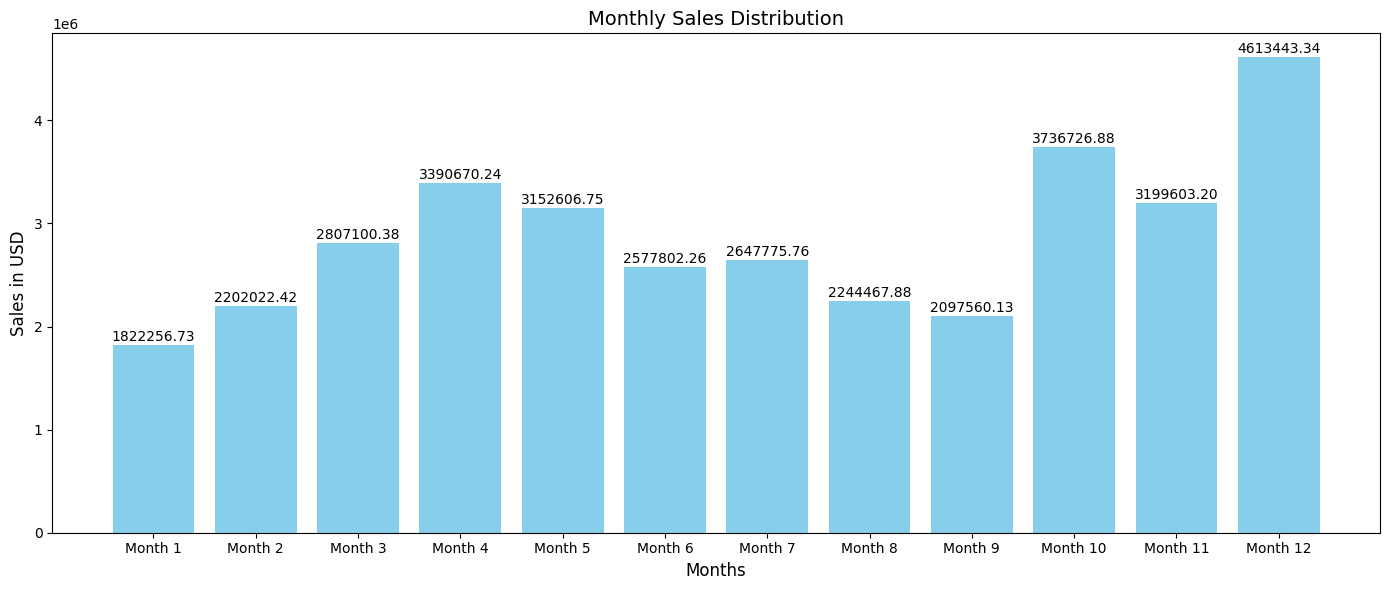

In [320]:
months = range(1, 13)

plt.figure(figsize=(14, 6))

bars = plt.bar(x=months, height=Sales_value, color='skyblue')

plt.xlabel('Months', fontsize=12)
plt.ylabel('Sales in USD', fontsize=12)

plt.title('Monthly Sales Distribution', fontsize=14)

for bar, value in zip(bars, Sales_value):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10000, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(months, [f'Month {m}' for m in months])

plt.tight_layout()
plt.show()

### 2: Thành phố nào có doanh số cao nhất?

In [321]:
# Tính tổng giá trị đơn hàng theo từng thành phố
sales_value_city = df.groupby('City')['Sales'].sum()
sales_value_city

City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64

In [322]:
cities = []
for city, sales in sales_value_city.items():
    cities.append(city)
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


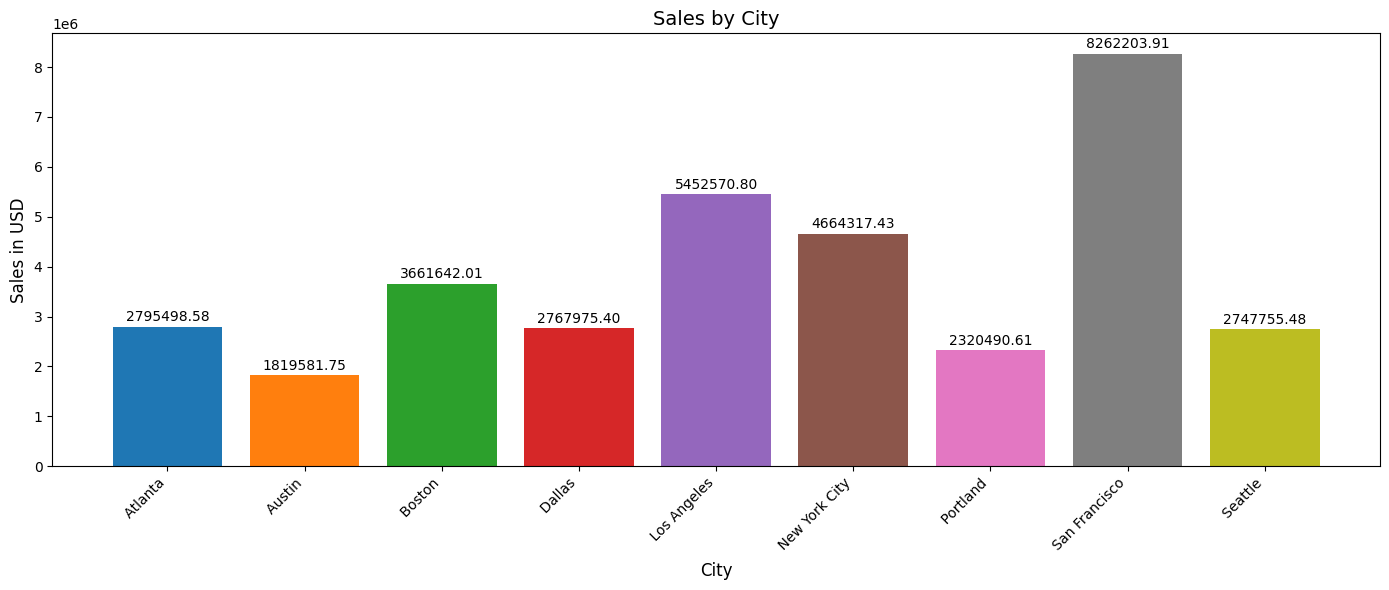

In [323]:
plt.figure(figsize=(14, 6))  # Kích thước của biểu đồ

# Vẽ biểu đồ cột với màu sắc khác nhau cho từng cột
bars = plt.bar(x=cities, height=sales_value_city, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])

# Đặt nhãn cho trục x và trục y
plt.xlabel('City', fontsize=12)
plt.ylabel('Sales in USD', fontsize=12)

# Tiêu đề của biểu đồ
plt.title('Sales by City', fontsize=14)

# Hiển thị giá trị trên từng cột
for bar, value in zip(bars, sales_value_city):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(cities, rotation=45, ha='right')  # Đặt nhãn cho trục x và xoay chúng

plt.tight_layout()
plt.show()

### 3: Doanh nghiệp cần chiếu quảng cáo vào thời gian nào để tăng khả năng mua hàng của khách hàng?

In [324]:
# Tính tổng giá trị mua hàng vào từng khung giờ
sales_value_hours = df.groupby('Hours')['Sales'].sum()
hours = [hour for hour, sales in sales_value_hours.items()]
sales_value_hours

Hours
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

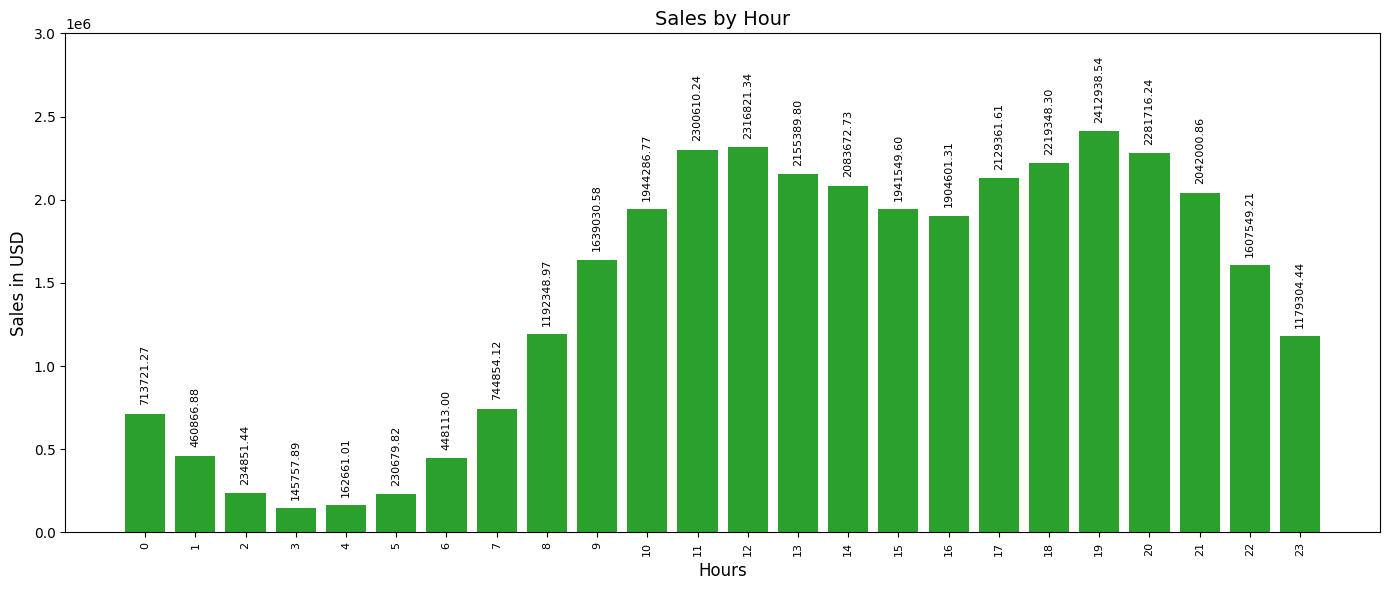

In [325]:
plt.figure(figsize=(14, 6)) 

bars = plt.bar(x=hours, height=sales_value_hours, color='#2ca02c')
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Sales in USD', fontsize=12)
plt.title('Sales by Hour', fontsize=14)

# Hiển thị giá trị trên từng cột
for bar, value in zip(bars, sales_value_hours):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000, f'{value:.2f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(hours, rotation=90, fontsize=8) 
plt.ylim(0, 3.0e6)  # Đặt giới hạn trục y từ 0 đến 3 triệu
plt.tight_layout()
plt.show()

In [326]:
#Tổng đơn hàng được đặt theo khung giờ
sales_QO_hours = df.groupby('Hours')['Quantity Ordered'].sum()
hours_QO = [hourQO for hourQO, sales in sales_QO_hours.items()]
sales_QO_hours

Hours
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64

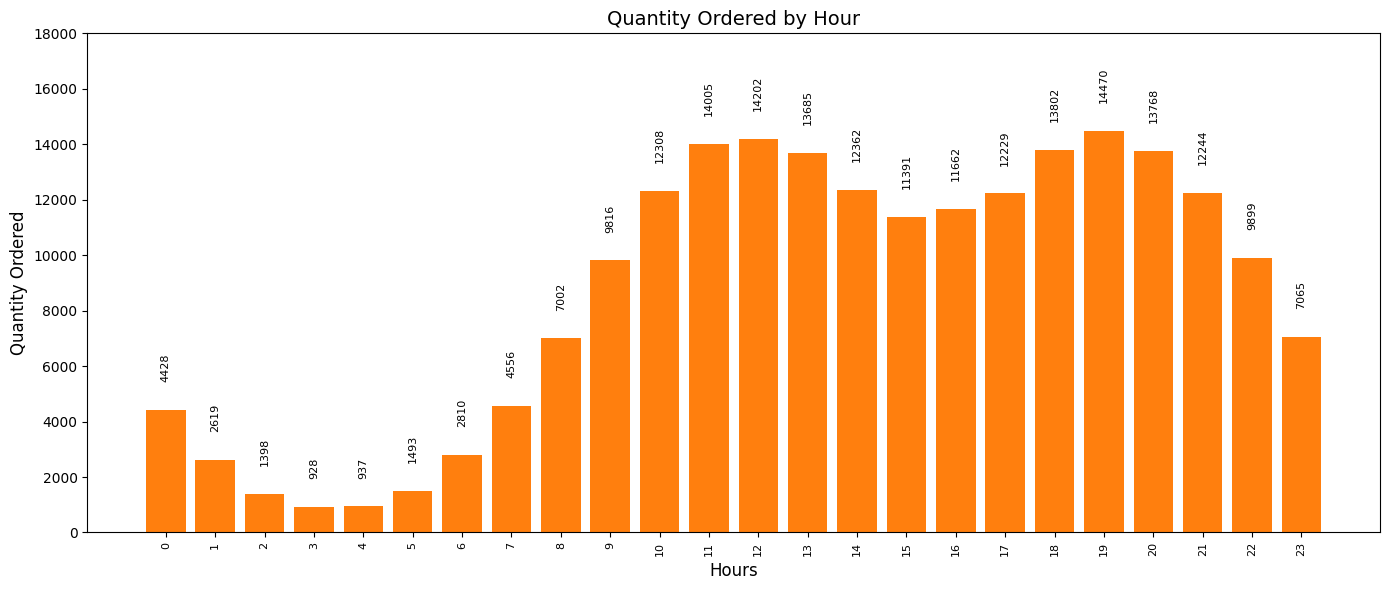

In [327]:
plt.figure(figsize=(14, 6)) 

bars = plt.bar(x=hours_QO, height=sales_QO_hours, color='#ff7f0e')
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.title('Quantity Ordered by Hour', fontsize=14)

# Hiển thị giá trị trên từng cột với khoảng trống 1000
for bar, value in zip(bars, sales_QO_hours):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{value}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(hours_QO, rotation=90, fontsize=8)  # Đặt nhãn cho trục x và xoay chúng

plt.ylim(0, 18000)  # Đặt giới hạn trục y

plt.tight_layout()
plt.show()

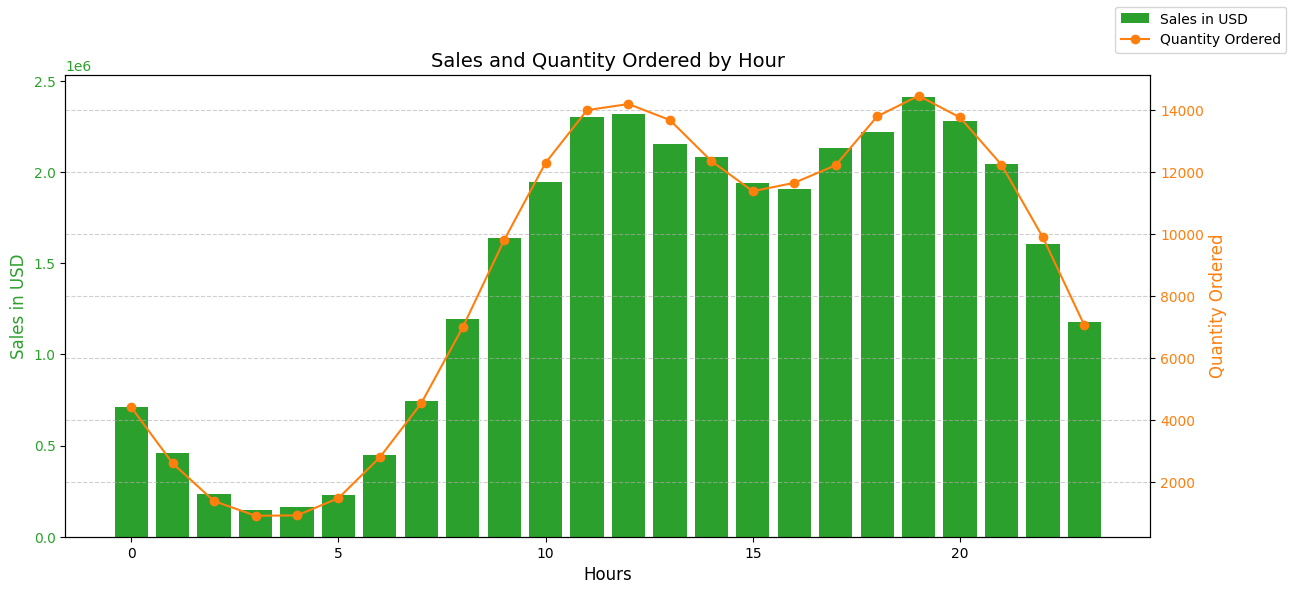

In [328]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Vẽ biểu đồ cho giá trị bán hàng
color = 'tab:green'
ax1.set_xlabel('Hours', fontsize=12)
ax1.set_ylabel('Sales in USD', color=color, fontsize=12)
ax1.bar(hours, sales_value_hours, color=color, label='Sales in USD')
ax1.tick_params(axis='y', labelcolor=color)

# Tạo một trục thứ hai chia sẻ trục x
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Quantity Ordered', color=color, fontsize=12)
ax2.plot(hours, sales_QO_hours, color=color, marker='o', label='Quantity Ordered')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales and Quantity Ordered by Hour', fontsize=14)
fig.legend(loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.6)  # Hiển thị lưới cho trục y

plt.show()

### 4: Những sản phẩm được bán cùng nhau?

In [329]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Boston,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,Los Angeles,9


In [330]:
#Tìm những sản phẩm được bán cùng nhau bằng cách nhóm các sản phẩm có cùng Order ID
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,Boston,11


In [331]:
df_dup.groupby('Order ID')['Product'].apply(', '.join)

Order ID
141275              USB-C Charging Cable, Wired Headphones
141290     Apple Airpods Headphones, AA Batteries (4-pack)
141365                   Vareebadd Phone, Wired Headphones
141384                  Google Phone, USB-C Charging Cable
141450            Google Phone, Bose SoundSport Headphones
                                ...                       
319536                Macbook Pro Laptop, Wired Headphones
319556                      Google Phone, Wired Headphones
319584                            iPhone, Wired Headphones
319596                    iPhone, Lightning Charging Cable
319631    34in Ultrawide Monitor, Lightning Charging Cable
Name: Product, Length: 7136, dtype: object

In [332]:
groupProduct = lambda product: ', '.join(product)

In [333]:
df_dup.loc[:, 'All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

/tmp/ipykernel_19840/2406791486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup.loc[:, 'All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Product
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,Los Angeles,19,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,Los Angeles,19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,Boston,11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [334]:
df_dup[['Order ID','All Product']].drop_duplicates()

,Order ID,All Product
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
11940,161920,"Google Phone, USB-C Charging Cable, AAA Batter..."
11967,161945,"USB-C Charging Cable, 34in Ultrawide Monitor"
11984,161960,"Vareebadd Phone, USB-C Charging Cable"
11997,161972,"Google Phone, USB-C Charging Cable"


In [335]:
df_dup['All Product'].value_counts().head(10)

All Product
iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: count, dtype: int64

### 5: Sản phẩm nào được bán nhiều nhất?

In [336]:
all_products = df.groupby('Product')['Quantity Ordered'].sum()
all_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [337]:
products_ls = [product for product, quant in all_products.items()]

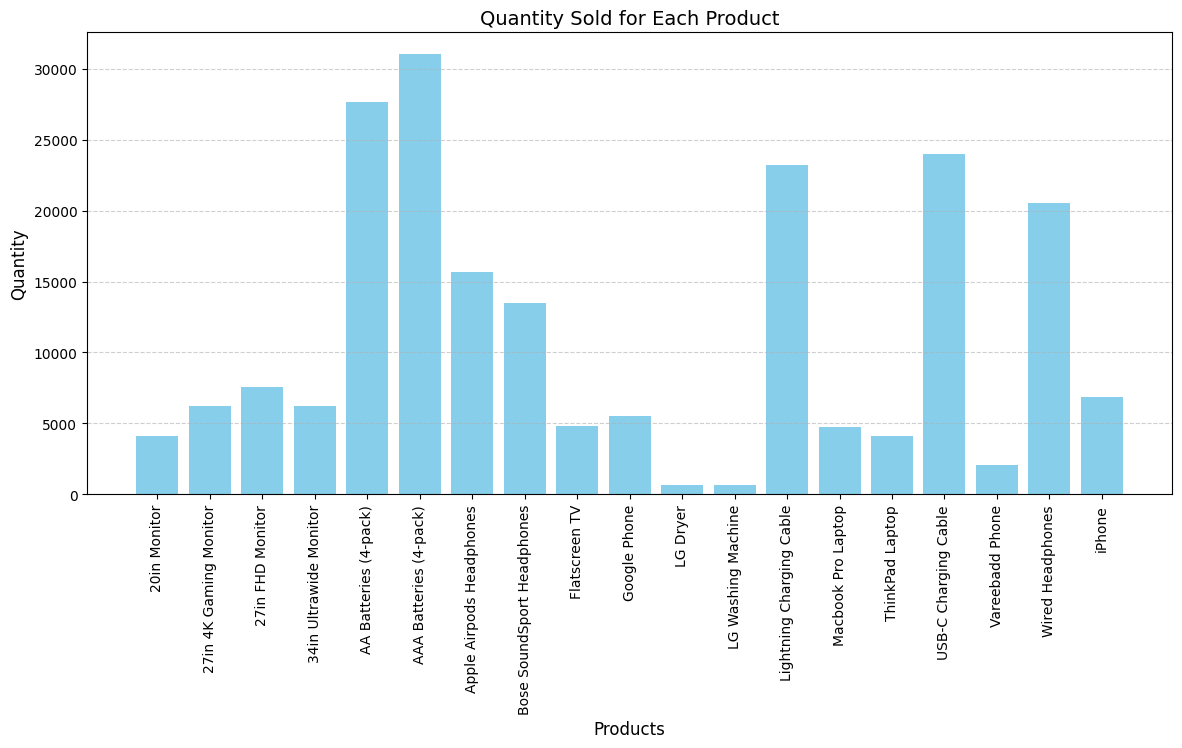

In [338]:
plt.figure(figsize=(14, 6))
plt.bar(products_ls, all_products, color='skyblue')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=90)
plt.title('Quantity Sold for Each Product', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Hiển thị lưới cho trục y

plt.show()


In [339]:
prices = df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/tmp/ipykernel_19840/1117387335.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


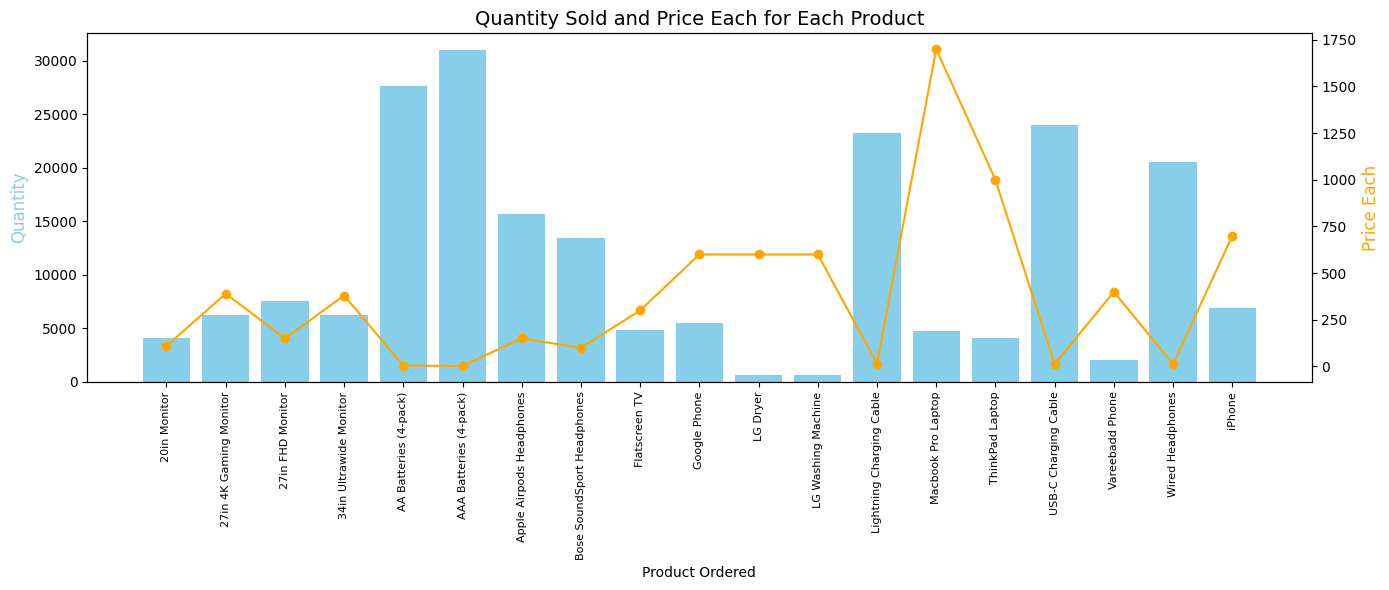

In [340]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax2 = ax1.twinx()
ax1.bar(products_ls, all_products, color='skyblue')
ax2.plot(products_ls, prices, color='orange', marker='o')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Product Ordered')
ax1.set_ylabel('Quantity', color='skyblue', fontsize=12)
ax2.set_ylabel('Price Each', color='orange', fontsize=12)

plt.title('Quantity Sold and Price Each for Each Product', fontsize=14)
plt.tight_layout()

plt.show()
